# **Kütüphaneler Importu**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, confusion_matrix, log_loss
from keras.layers import Conv1D, Flatten, MaxPooling1D
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

# **Dataset Hazırlanması**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Yapay_Zeka_Proje/Weather_Data.csv")
df.replace(['No', 'Yes'], [0, 1], inplace=True)
df.drop(['Date', 'WindGustSpeed'], axis=1, inplace=True)
direction_map = {'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
                 'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11, 'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15}
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[column] = df[column].map(direction_map)
#df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
#df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
#df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
#df = pd.get_dummies(data = df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
#df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df = df.astype(float)
df.head(100)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,12.0,8.0,9.0,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,19.5,25.6,6.0,3.4,2.7,12.0,12.0,4.0,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,21.6,24.5,6.6,2.4,0.1,12.0,5.0,5.0,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,20.2,22.8,18.8,2.2,0.0,12.0,1.0,4.0,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,19.7,25.7,77.4,4.8,0.0,12.0,1.0,12.0,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.0,23.0,0.0,3.6,9.4,12.0,12.0,7.0,22.0,13.0,57.0,44.0,1014.3,1011.8,1.0,3.0,16.5,22.0,0.0,0.0
96,11.0,21.8,0.0,3.2,10.2,12.0,12.0,8.0,24.0,15.0,63.0,45.0,1019.2,1017.5,1.0,1.0,14.0,20.8,0.0,0.0
97,11.0,21.9,0.0,3.2,10.1,12.0,12.0,6.0,17.0,11.0,75.0,60.0,1021.4,1020.2,0.0,1.0,14.3,20.6,0.0,0.0
98,12.6,21.3,0.0,3.0,9.6,12.0,13.0,4.0,11.0,11.0,86.0,67.0,1022.2,1019.6,1.0,1.0,15.2,19.3,0.0,0.0


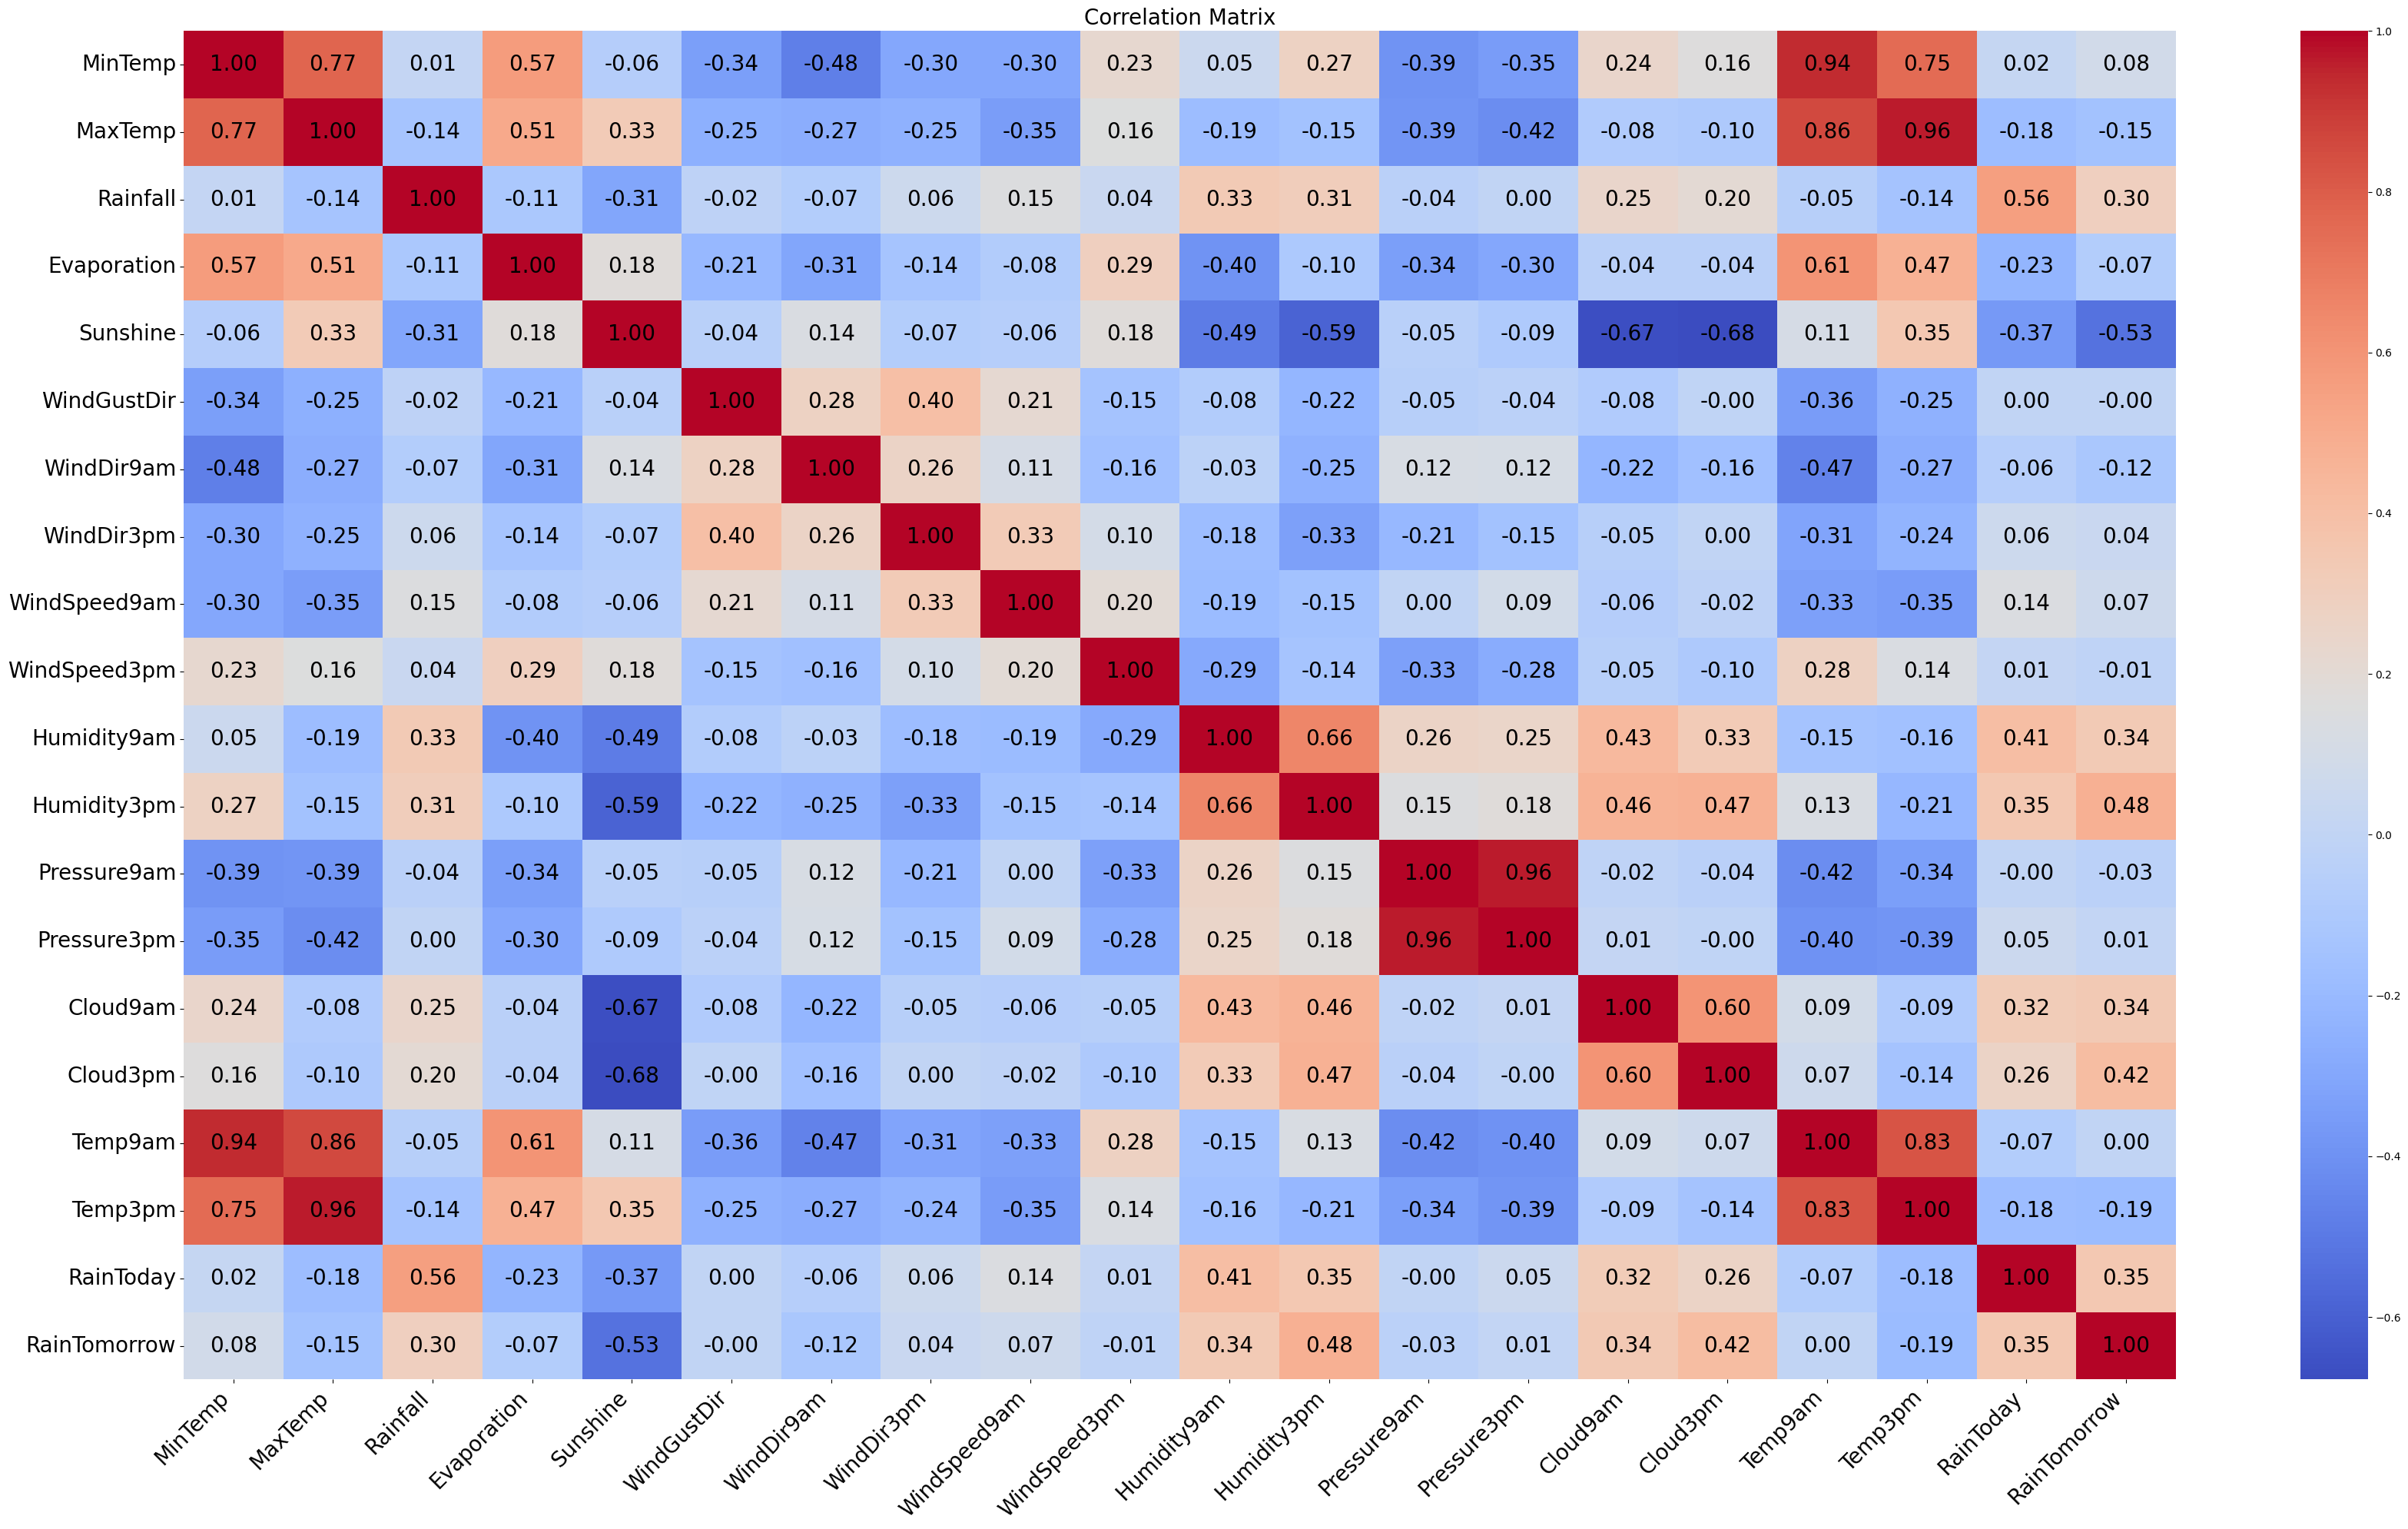

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 20, "color": "black"})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=20, rotation=45, ha="right")
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [5]:
correlated_features = correlation_matrix["RainTomorrow"].abs().sort_values(ascending=False)
important_features = correlated_features[correlated_features > 0.1].index.tolist()
df = df[important_features]
df.head(20)

,RainTomorrow,Sunshine,Humidity3pm,Cloud3pm,RainToday,Cloud9am,Humidity9am,Rainfall,Temp3pm,MaxTemp,WindDir9am
0,1.0,0.0,84.0,8.0,1.0,8.0,92.0,15.6,20.9,22.4,8.0
1,1.0,2.7,73.0,7.0,1.0,7.0,83.0,6.0,24.8,25.6,12.0
2,1.0,0.1,86.0,8.0,1.0,7.0,88.0,6.6,23.0,24.5,5.0
3,1.0,0.0,90.0,8.0,1.0,8.0,83.0,18.8,20.9,22.8,1.0
4,1.0,0.0,74.0,8.0,1.0,8.0,88.0,77.4,25.5,25.7,1.0
5,1.0,8.6,62.0,6.0,1.0,6.0,69.0,1.6,26.0,27.2,12.0
6,1.0,5.2,80.0,7.0,1.0,4.0,75.0,6.2,22.3,26.3,12.0
7,1.0,2.1,61.0,8.0,1.0,7.0,77.0,27.6,21.1,22.3,8.0
8,1.0,3.0,91.0,7.0,1.0,7.0,92.0,12.6,16.5,20.8,9.0
9,0.0,10.1,53.0,2.0,1.0,4.0,80.0,8.8,23.3,24.2,12.0


In [6]:
features = df.drop(columns='RainTomorrow', axis=1)
Y = df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **KNN**

In [8]:
KNN = KNeighborsClassifier()
KNN_params = {
    'n_neighbors': range(20,31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']
}
KNN_grid = GridSearchCV(KNN, KNN_params, cv=5)
KNN_grid.fit(x_train_scaled, y_train)
KNN_best = KNN_grid.best_estimator_

In [9]:
KNN_predictions = KNN_best.predict(x_test_scaled)
KNN_probabilities = KNN_best.predict_proba(x_test_scaled)[:, 1]
KNN_Accuracy_Score = accuracy_score(y_test, KNN_predictions)
KNN_JaccardIndex = jaccard_score(y_test, KNN_predictions, average='binary')
KNN_F1_Score = f1_score(y_test, KNN_predictions, average='binary')
KNN_Log_Loss = log_loss(y_test, KNN_probabilities)

In [10]:
print(f"Best Hyperparameters: {KNN_grid.best_params_}")
print(f"Accuracy Score: {KNN_Accuracy_Score}")
print(f"Jaccard Index: {KNN_JaccardIndex}")
print(f"F1 Score: {KNN_F1_Score}")
print(f"Log Loss: {KNN_Log_Loss}")

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'distance'}
Accuracy Score: 0.833587786259542
Jaccard Index: 0.48095238095238096
F1 Score: 0.6495176848874599
Log Loss: 0.546094175997869


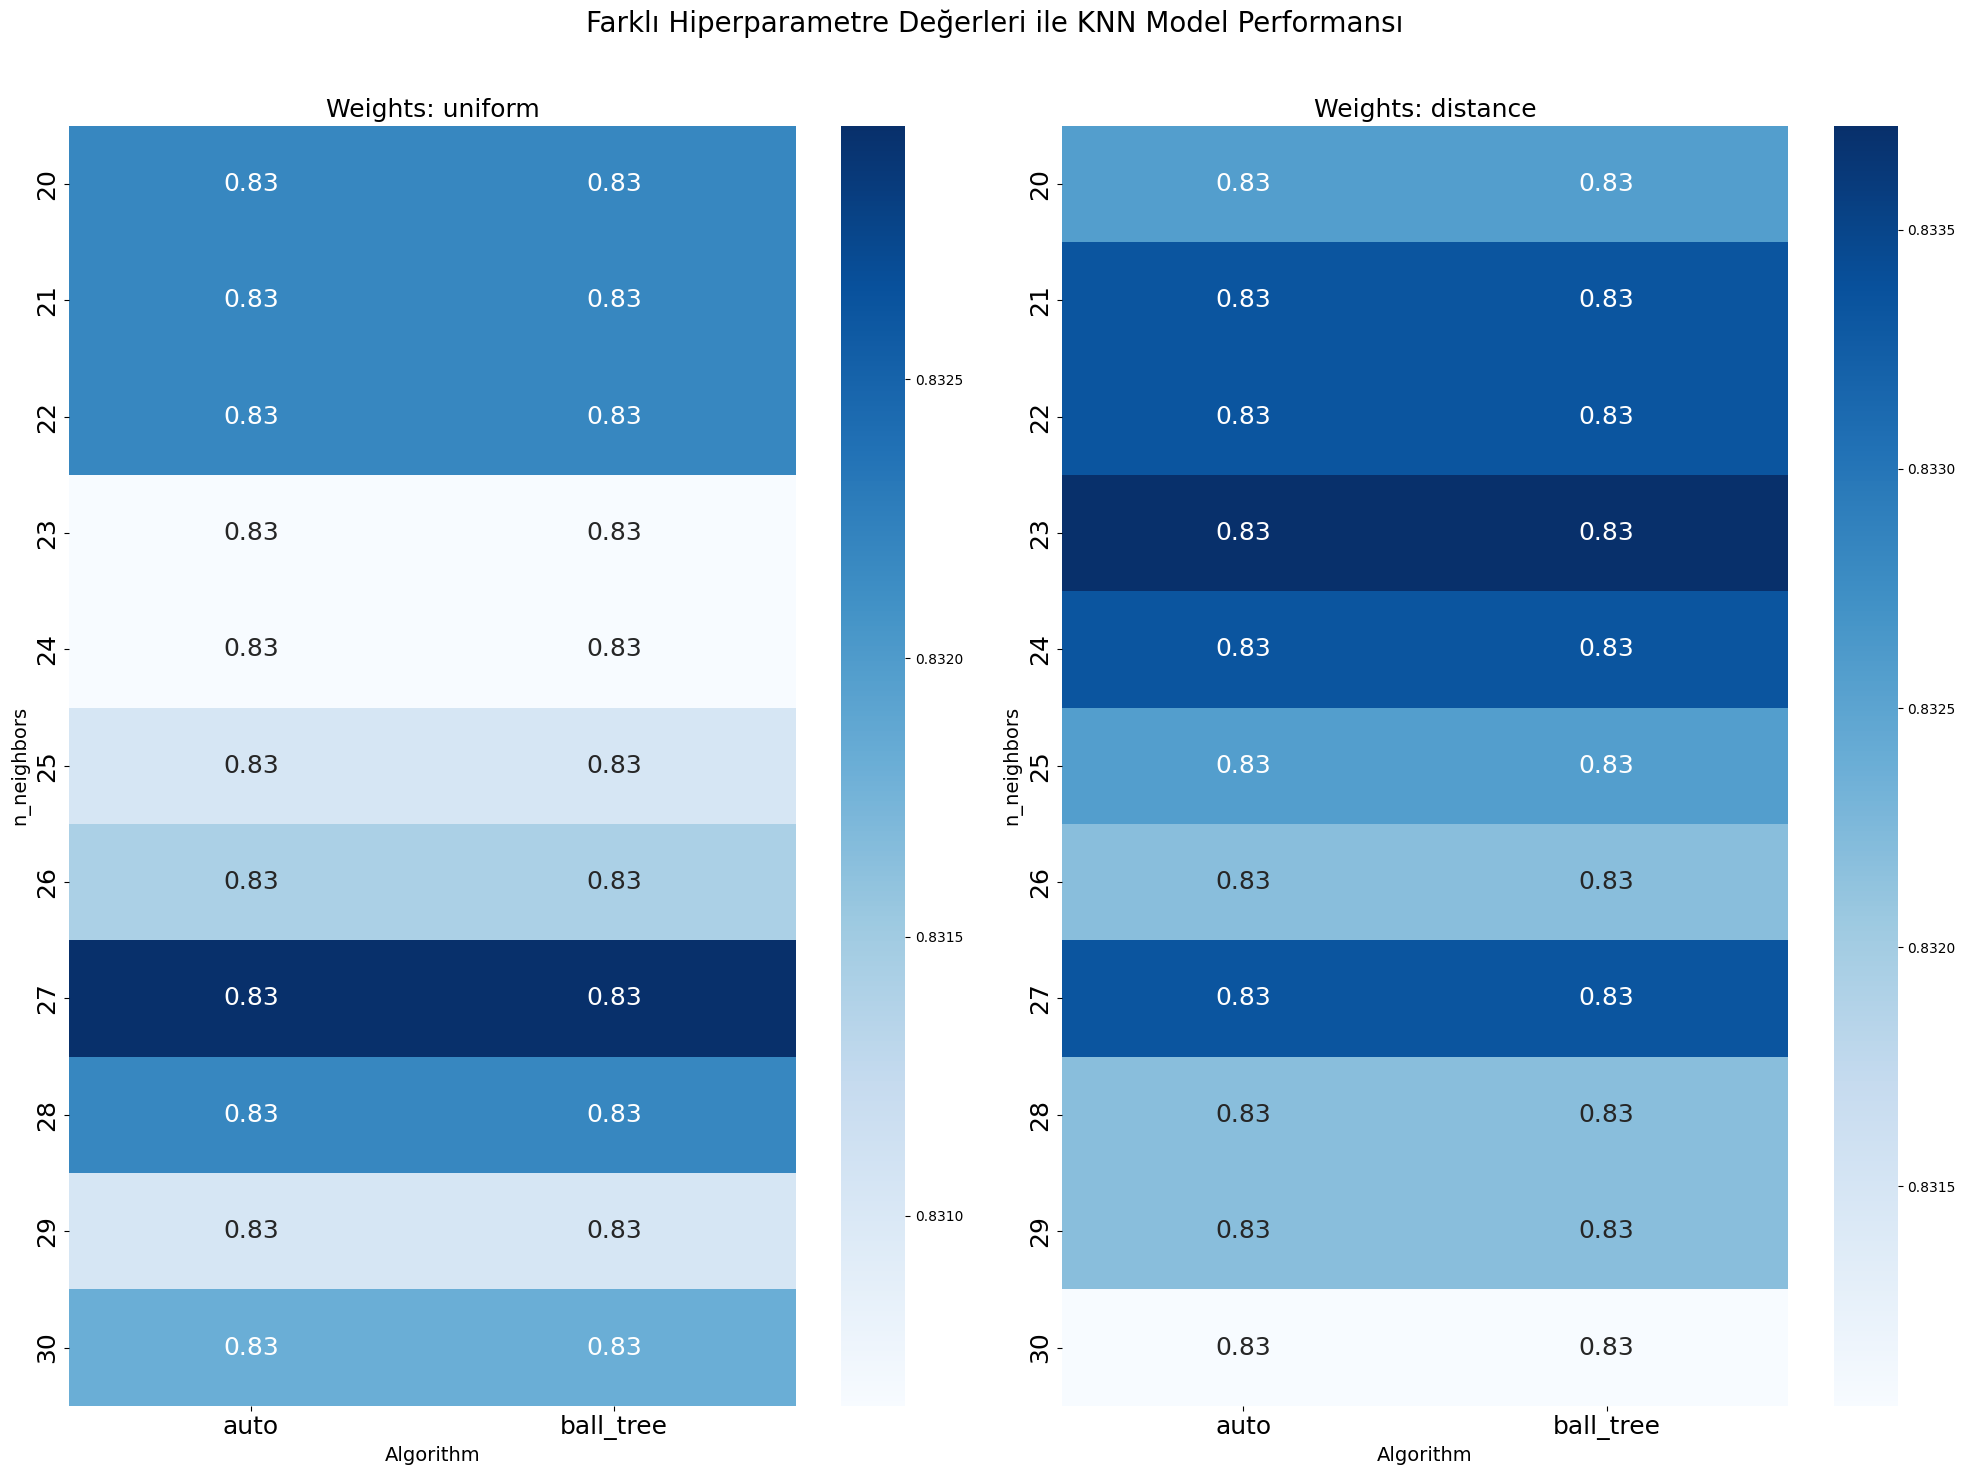

In [11]:
results = KNN_grid.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

n_neighbors_vals = list(range(20, 31))
weights_vals = ['uniform', 'distance']
algorithm_vals = ['auto', 'ball_tree']
scores_matrix = np.zeros((len(n_neighbors_vals), len(weights_vals), len(algorithm_vals)))

for i, param in enumerate(params):
    n_neighbors_idx = n_neighbors_vals.index(param['n_neighbors'])
    weights_idx = weights_vals.index(param['weights'])
    algorithm_idx = algorithm_vals.index(param['algorithm'])
    scores_matrix[n_neighbors_idx, weights_idx, algorithm_idx] = mean_test_scores[i]

fig, axes = plt.subplots(1, 2, figsize=(20, 15))

sns.heatmap(scores_matrix[:, 0, :], annot=True, annot_kws={"size": 18}, ax=axes[0], xticklabels=algorithm_vals, yticklabels=n_neighbors_vals, cmap='Blues')
axes[0].set_title('Weights: uniform',fontsize=18)
axes[0].set_xlabel('Algorithm',fontsize=14)
axes[0].set_ylabel('n_neighbors',fontsize=14)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)

sns.heatmap(scores_matrix[:, 1, :], annot=True, annot_kws={"size": 18}, ax=axes[1], xticklabels=algorithm_vals, yticklabels=n_neighbors_vals, cmap='Blues')
axes[1].set_title('Weights: distance',fontsize=18)
axes[1].set_xlabel('Algorithm',fontsize=14)
axes[1].set_ylabel('n_neighbors',fontsize=14)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)

fig.suptitle('Farklı Hiperparametre Değerleri ile KNN Model Performansı', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

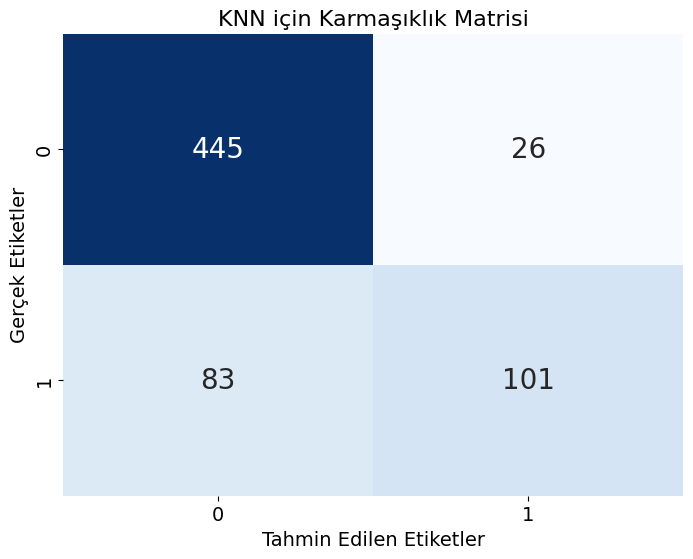

In [12]:
cm_knn = confusion_matrix(y_test, KNN_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, annot_kws={"size": 20}, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN için Karmaşıklık Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen Etiketler', fontsize=14)
plt.ylabel('Gerçek Etiketler', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
joblib.dump(KNN_best, 'KNN.job')

['KNN.job']

# **Karar Ağacı**

In [14]:
Tree = DecisionTreeClassifier()
Tree_params = {
    'max_depth': range(1,11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
Tree_grid.fit(x_train, y_train)
Tree_best = Tree_grid.best_estimator_

In [15]:
Tree_predictions = Tree_best.predict(x_test)
Tree_probabilities = Tree_best.predict_proba(x_test)[:, 1]
Tree_Accuracy_Score = accuracy_score(y_test, Tree_predictions)
Tree_JaccardIndex = jaccard_score(y_test, Tree_predictions, average='binary')
Tree_F1_Score = f1_score(y_test, Tree_predictions, average='binary')
Tree_Log_Loss = log_loss(y_test, Tree_probabilities)

In [16]:
print(f"Best Hyperparameters: {Tree_grid.best_params_}")
print(f"Accuracy Score: {Tree_Accuracy_Score}")
print(f"Jaccard Index: {Tree_JaccardIndex}")
print(f"F1 Score: {Tree_F1_Score}")
print(f"Log Loss: {Tree_Log_Loss}")

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy Score: 0.8244274809160306
Jaccard Index: 0.4724770642201835
F1 Score: 0.6417445482866043
Log Loss: 0.5079581812471048


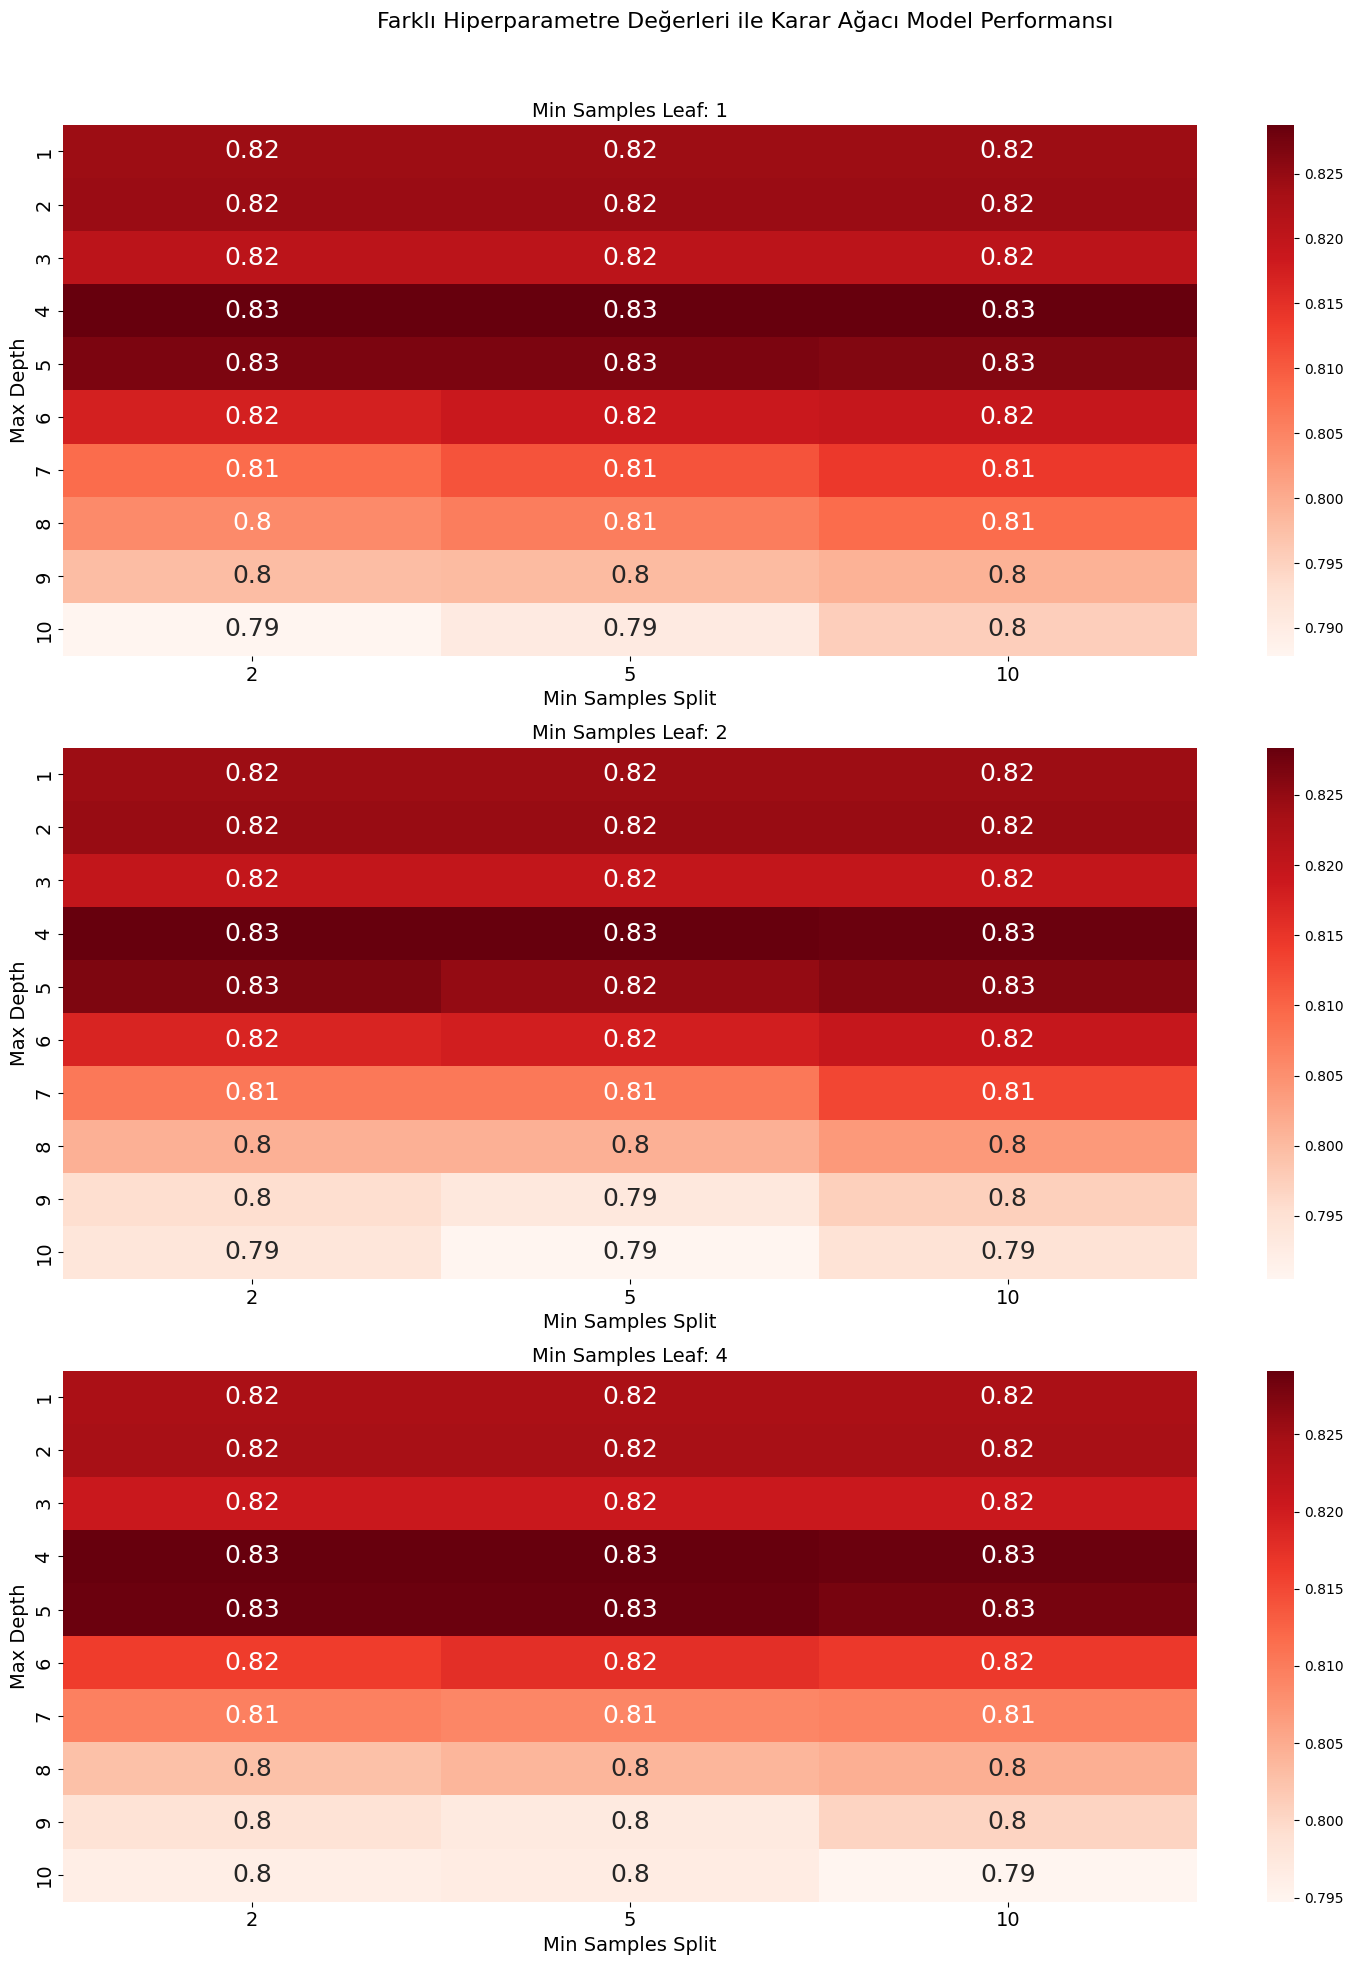

In [17]:
results = Tree_grid.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

max_depth_vals = list(range(1, 11))
min_samples_split_vals = [2, 5, 10]
min_samples_leaf_vals = [1, 2, 4]
scores_matrix = np.zeros((len(max_depth_vals), len(min_samples_split_vals), len(min_samples_leaf_vals)))

for i, param in enumerate(params):
    max_depth_idx = max_depth_vals.index(param['max_depth'])
    min_samples_split_idx = min_samples_split_vals.index(param['min_samples_split'])
    min_samples_leaf_idx = min_samples_leaf_vals.index(param['min_samples_leaf'])
    scores_matrix[max_depth_idx, min_samples_split_idx, min_samples_leaf_idx] = mean_test_scores[i]

fig, axes = plt.subplots(3, 1, figsize=(15, 20))

sns.heatmap(scores_matrix[:, :, 0], annot=True, annot_kws={"size": 18}, ax=axes[0], xticklabels=min_samples_split_vals, yticklabels=max_depth_vals, cmap='Reds')
axes[0].set_title('Min Samples Leaf: 1', fontsize=14)
axes[0].set_xlabel('Min Samples Split', fontsize=14)
axes[0].set_ylabel('Max Depth', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

sns.heatmap(scores_matrix[:, :, 1], annot=True, annot_kws={"size": 18}, ax=axes[1], xticklabels=min_samples_split_vals, yticklabels=max_depth_vals, cmap='Reds')
axes[1].set_title('Min Samples Leaf: 2', fontsize=14)
axes[1].set_xlabel('Min Samples Split', fontsize=14)
axes[1].set_ylabel('Max Depth', fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

sns.heatmap(scores_matrix[:, :, 2], annot=True, annot_kws={"size": 18}, ax=axes[2], xticklabels=min_samples_split_vals, yticklabels=max_depth_vals, cmap='Reds')
axes[2].set_title('Min Samples Leaf: 4', fontsize=14)
axes[2].set_xlabel('Min Samples Split', fontsize=14)
axes[2].set_ylabel('Max Depth', fontsize=14)
axes[2].tick_params(axis='x', labelsize=14)
axes[2].tick_params(axis='y', labelsize=14)

fig.suptitle('Farklı Hiperparametre Değerleri ile Karar Ağacı Model Performansı', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

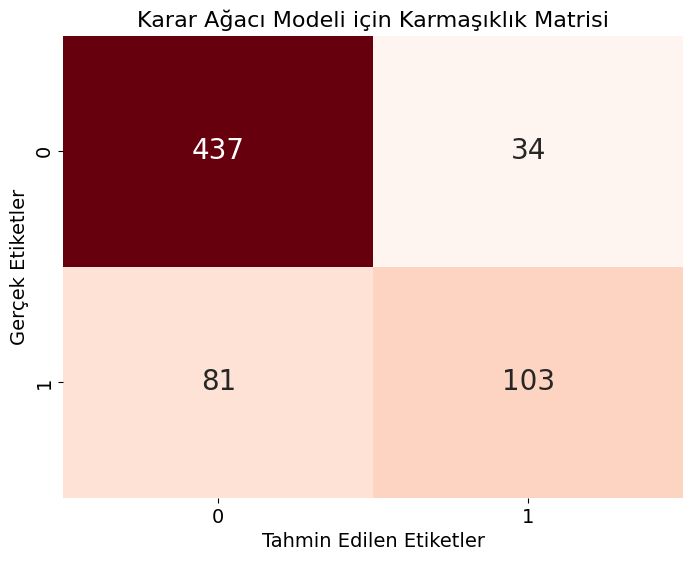

In [18]:
cm_Tree = confusion_matrix(y_test, Tree_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Tree, annot=True, annot_kws={"size": 20}, fmt='d', cmap='Reds', cbar=False)
plt.title('Karar Ağacı Modeli için Karmaşıklık Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen Etiketler', fontsize=14)
plt.ylabel('Gerçek Etiketler', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
joblib.dump(Tree_best, 'Tree.job')

['Tree.job']

# **Lojistik Regresyon**

In [22]:
LR = LogisticRegression()
LR_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs','newton-cg'],
    'max_iter': [100, 200]
}
LR_grid = GridSearchCV(LR, LR_params, cv=5, scoring='accuracy')
LR_grid.fit(x_train_scaled, y_train)
LR_best = LR_grid.best_estimator_

In [23]:
LR_predictions = LR_best.predict(x_test_scaled)
LR_probabilities = LR_best.predict_proba(x_test_scaled)[:, 1]
LR_Accuracy_Score = accuracy_score(y_test, LR_predictions)
LR_JaccardIndex = jaccard_score(y_test, LR_predictions, average='binary')
LR_F1_Score = f1_score(y_test, LR_predictions, average='binary')
LR_Log_Loss = log_loss(y_test, LR_probabilities)

In [24]:
print(f"Best Hyperparameters: {LR_grid.best_params_}")
print(f"Accuracy Score: {LR_Accuracy_Score}")
print(f"Jaccard Index: {LR_JaccardIndex}")
print(f"F1 Score: {LR_F1_Score}")
print(f"Log Loss: {LR_Log_Loss}")

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy Score: 0.8305343511450382
Jaccard Index: 0.4908256880733945
F1 Score: 0.6584615384615384
Log Loss: 0.3751612378106529


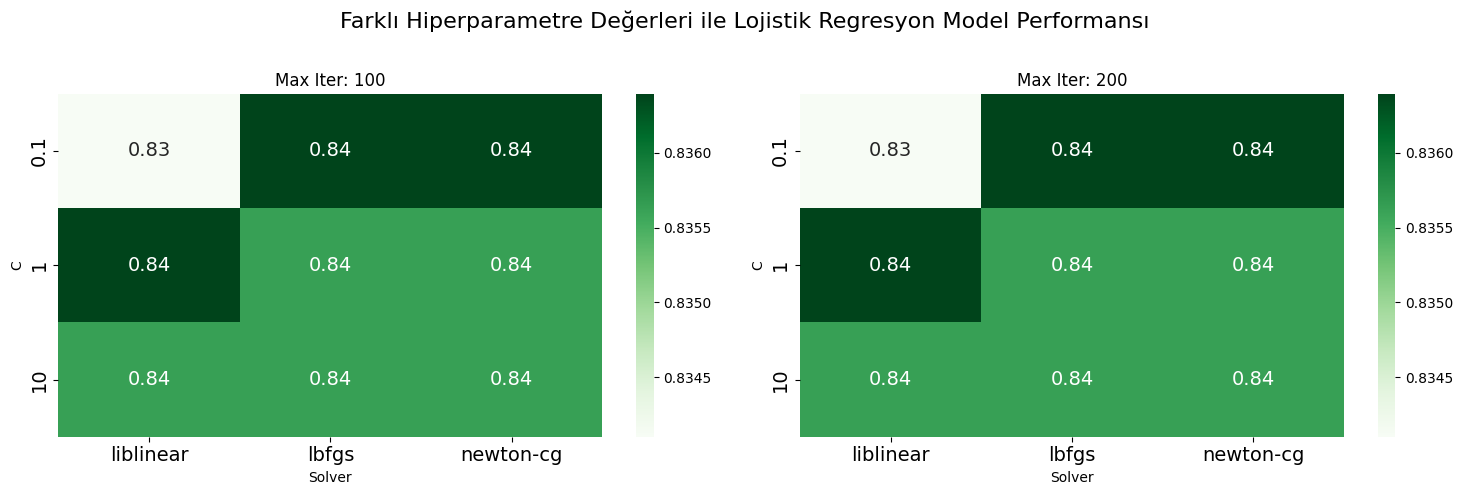

In [25]:
results = LR_grid.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

C_vals = [0.1, 1, 10]
solver_vals = ['liblinear', 'lbfgs','newton-cg']
max_iter_vals = [100, 200]
scores_matrix = np.zeros((len(C_vals), len(solver_vals), len(max_iter_vals)))

for i, param in enumerate(params):
    C_idx = C_vals.index(param['C'])
    solver_idx = solver_vals.index(param['solver'])
    max_iter_idx = max_iter_vals.index(param['max_iter'])
    scores_matrix[C_idx, solver_idx, max_iter_idx] = mean_test_scores[i]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(scores_matrix[:, :, 0], annot=True, annot_kws={"size": 14}, ax=axes[0], xticklabels=solver_vals, yticklabels=C_vals, cmap='Greens')
axes[0].set_title('Max Iter: 100')
axes[0].set_xlabel('Solver')
axes[0].set_ylabel('C')
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

sns.heatmap(scores_matrix[:, :, 1], annot=True, annot_kws={"size": 14}, ax=axes[1], xticklabels=solver_vals, yticklabels=C_vals, cmap='Greens')
axes[1].set_title('Max Iter: 200')
axes[1].set_xlabel('Solver')
axes[1].set_ylabel('C')
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

fig.suptitle('Farklı Hiperparametre Değerleri ile Lojistik Regresyon Model Performansı', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

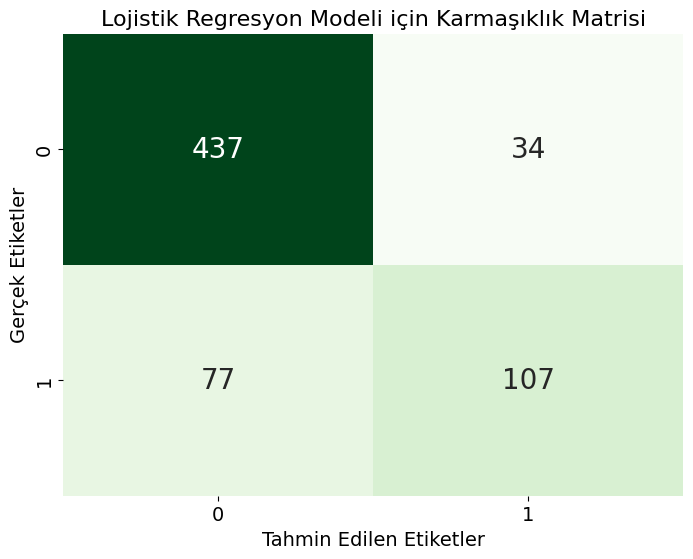

In [26]:
cm_LR = confusion_matrix(y_test, LR_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR, annot=True, annot_kws={"size": 20}, fmt='d', cmap='Greens', cbar=False)
plt.title('Lojistik Regresyon Modeli için Karmaşıklık Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen Etiketler', fontsize=14)
plt.ylabel('Gerçek Etiketler', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [27]:
joblib.dump(LR_best, 'LR.job')

['LR.job']

# **SVC**

In [28]:
SVC_model = SVC(probability=True)
SVC_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
SVC_grid = GridSearchCV(SVC_model, SVC_params, cv=5)
SVC_grid.fit(x_train_scaled, y_train)
SVC_best = SVC_grid.best_estimator_

In [29]:
SVC_predictions = SVC_best.predict(x_test_scaled)
SVC_probabilities = SVC_best.predict_proba(x_test_scaled)[:, 1]
SVC_Accuracy_Score = accuracy_score(y_test, SVC_predictions)
SVC_JaccardIndex = jaccard_score(y_test, SVC_predictions, average='binary')
SVC_F1_Score = f1_score(y_test, SVC_predictions, average='binary')
SVC_Log_Loss = log_loss(y_test, SVC_probabilities)

In [30]:
print(f"Best Hyperparameters: {SVC_grid.best_params_}")
print(f"Accuracy Score: {SVC_Accuracy_Score}")
print(f"Jaccard Index: {SVC_JaccardIndex}")
print(f"F1 Score: {SVC_F1_Score}")
print(f"Log Loss: {SVC_Log_Loss}")

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy Score: 0.8320610687022901
Jaccard Index: 0.46859903381642515
F1 Score: 0.6381578947368421
Log Loss: 0.4145279996452884


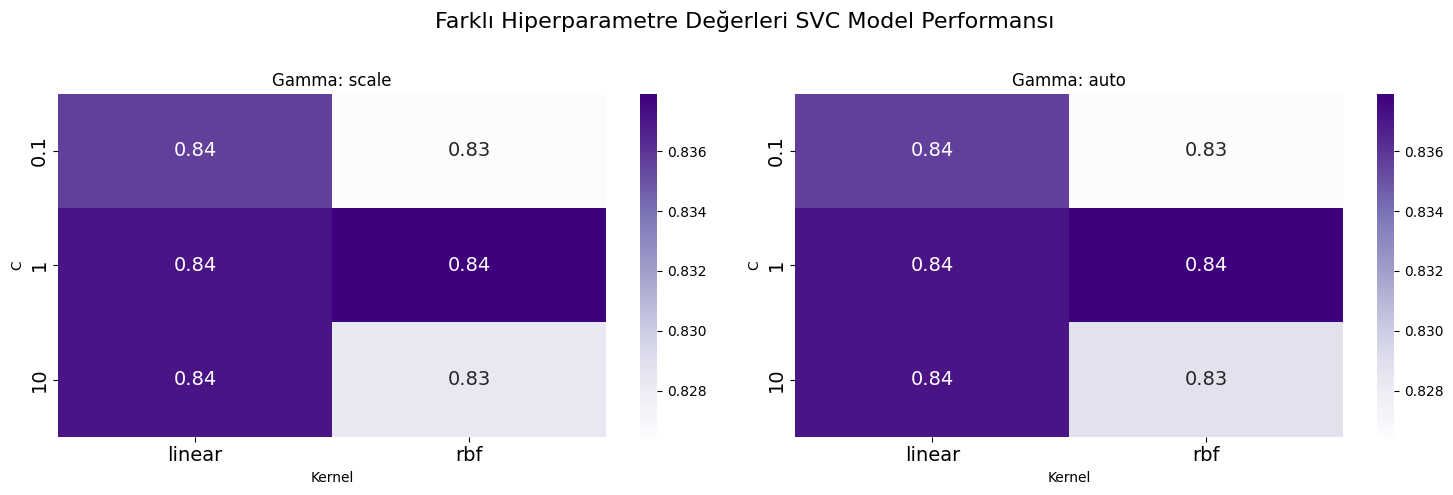

In [31]:
results = SVC_grid.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

C_vals = [0.1, 1, 10]
kernel_vals = ['linear', 'rbf']
gamma_vals = ['scale', 'auto']
scores_matrix = np.zeros((len(C_vals), len(kernel_vals), len(gamma_vals)))

for i, param in enumerate(params):
    C_idx = C_vals.index(param['C'])
    kernel_idx = kernel_vals.index(param['kernel'])
    gamma_idx = gamma_vals.index(param['gamma'])
    scores_matrix[C_idx, kernel_idx, gamma_idx] = mean_test_scores[i]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(scores_matrix[:, :, 0], annot=True, annot_kws={"size": 14},ax=axes[0], xticklabels=kernel_vals, yticklabels=C_vals, cmap='Purples')
axes[0].set_title('Gamma: scale')
axes[0].set_xlabel('Kernel')
axes[0].set_ylabel('C')
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

sns.heatmap(scores_matrix[:, :, 1], annot=True, annot_kws={"size": 14}, ax=axes[1], xticklabels=kernel_vals, yticklabels=C_vals, cmap='Purples')
axes[1].set_title('Gamma: auto')
axes[1].set_xlabel('Kernel')
axes[1].set_ylabel('C')
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

fig.suptitle('Farklı Hiperparametre Değerleri SVC Model Performansı', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

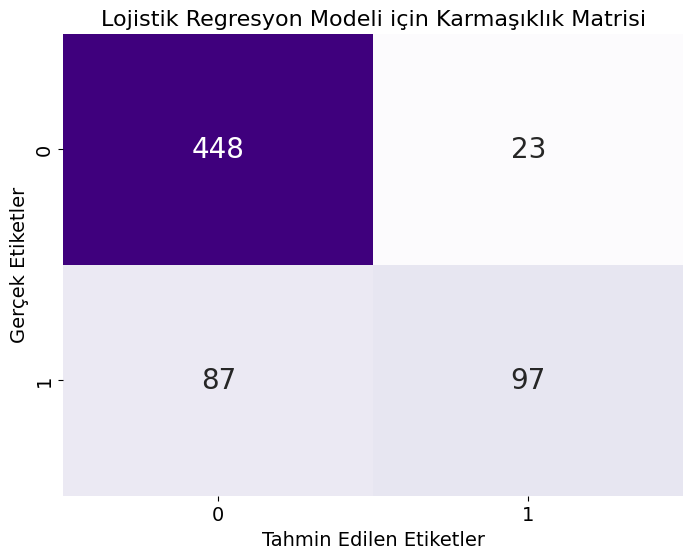

In [32]:
cm_SVC = confusion_matrix(y_test, SVC_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVC, annot=True, annot_kws={"size": 20}, fmt='d', cmap='Purples', cbar=False)
plt.title('Lojistik Regresyon Modeli için Karmaşıklık Matrisi', fontsize=16)
plt.xlabel('Tahmin Edilen Etiketler', fontsize=14)
plt.ylabel('Gerçek Etiketler', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
joblib.dump(SVC_best, 'SVC.job')

['SVC.job']

# **ANN**

In [ ]:
#lb = LabelBinarizer()
#y_train_binary = lb.fit_transform(y_train)
#y_test_binary = lb.transform(y_test)

In [34]:
def ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
cv_scores = []

In [36]:
for train_index, val_index in kf.split(x_train_scaled):
    x_fold_train, x_fold_val = x_train_scaled[train_index], x_train_scaled[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = ann_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(x_fold_train, y_fold_train, epochs=50, batch_size=10, validation_data=(x_fold_val, y_fold_val), callbacks=[early_stopping], verbose=1)

    scores = model.evaluate(x_fold_val, y_fold_val, verbose=0)
    cv_scores.append(scores[1])
    print(f'Fold Score: {scores[1]}')

mean_cv_score = np.mean(cv_scores)
print(f'Mean CV Score: {mean_cv_score}')

Epoch 1/50
210/210 [==============================] - 8s 10ms/step - loss: 0.4461 - accuracy: 0.8126 - val_loss: 0.3843 - val_accuracy: 0.8187
Epoch 2/50
210/210 [==============================] - 2s 8ms/step - loss: 0.3843 - accuracy: 0.8370 - val_loss: 0.3963 - val_accuracy: 0.8111
Epoch 3/50
210/210 [==============================] - 1s 7ms/step - loss: 0.3758 - accuracy: 0.8394 - val_loss: 0.3799 - val_accuracy: 0.8321
Epoch 4/50
210/210 [==============================] - 1s 6ms/step - loss: 0.3684 - accuracy: 0.8413 - val_loss: 0.3802 - val_accuracy: 0.8263
Epoch 5/50
210/210 [==============================] - 1s 7ms/step - loss: 0.3647 - accuracy: 0.8446 - val_loss: 0.3846 - val_accuracy: 0.8282
Epoch 6/50
210/210 [==============================] - 1s 3ms/step - loss: 0.3630 - accuracy: 0.8432 - val_loss: 0.3827 - val_accuracy: 0.8282
Epoch 7/50
210/210 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8399 - val_loss: 0.3903 - val_accuracy: 0.8092
Epoch

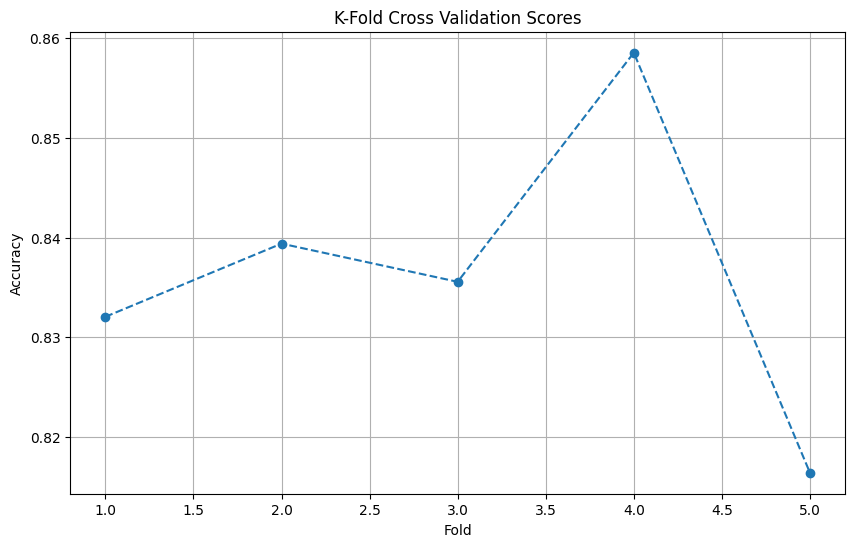

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, kf.get_n_splits() + 1), cv_scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Scores')
plt.grid(True)
plt.show()

In [38]:
model = ann_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
210/210 [==============================] - 2s 4ms/step - loss: 0.4596 - accuracy: 0.7921 - val_loss: 0.4100 - val_accuracy: 0.8263
Epoch 2/50
210/210 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8360 - val_loss: 0.3983 - val_accuracy: 0.8359
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3761 - accuracy: 0.8375 - val_loss: 0.4005 - val_accuracy: 0.8149
Epoch 4/50
210/210 [==============================] - 1s 6ms/step - loss: 0.3701 - accuracy: 0.8351 - val_loss: 0.3908 - val_accuracy: 0.8359
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3653 - accuracy: 0.8423 - val_loss: 0.3978 - val_accuracy: 0.8206
Epoch 6/50
210/210 [==============================] - 1s 7ms/step - loss: 0.3631 - accuracy: 0.8437 - val_loss: 0.3940 - val_accuracy: 0.8302
Epoch 7/50
210/210 [==============================] - 2s 10ms/step - loss: 0.3613 - accuracy: 0.8432 - val_loss: 0.3867 - val_accuracy: 0.8359
Epoch

In [39]:
ANN_accuracy = model.evaluate(x_test_scaled, y_test, verbose=0)[1]
ANN_predictions = (model.predict(x_test_scaled) > 0.5).astype("int32")
ANN_probabilities = model.predict(x_test_scaled)
ANN_JaccardIndex = jaccard_score(y_test, ANN_predictions, average='binary')
ANN_F1_Score = f1_score(y_test, ANN_predictions, average='binary')
ANN_Log_Loss = log_loss(y_test, ANN_probabilities)

print(f"Accuracy Score: {ANN_accuracy}")
print(f"Jaccard Index: {ANN_JaccardIndex}")
print(f"F1 Score: {ANN_F1_Score}")
print(f"Log Loss: {ANN_Log_Loss}")


21/21 [==============================] - 0s 2ms/step
Accuracy Score: 0.8320610523223877
Jaccard Index: 0.5
F1 Score: 0.6666666666666666
Log Loss: 0.3775126107568695


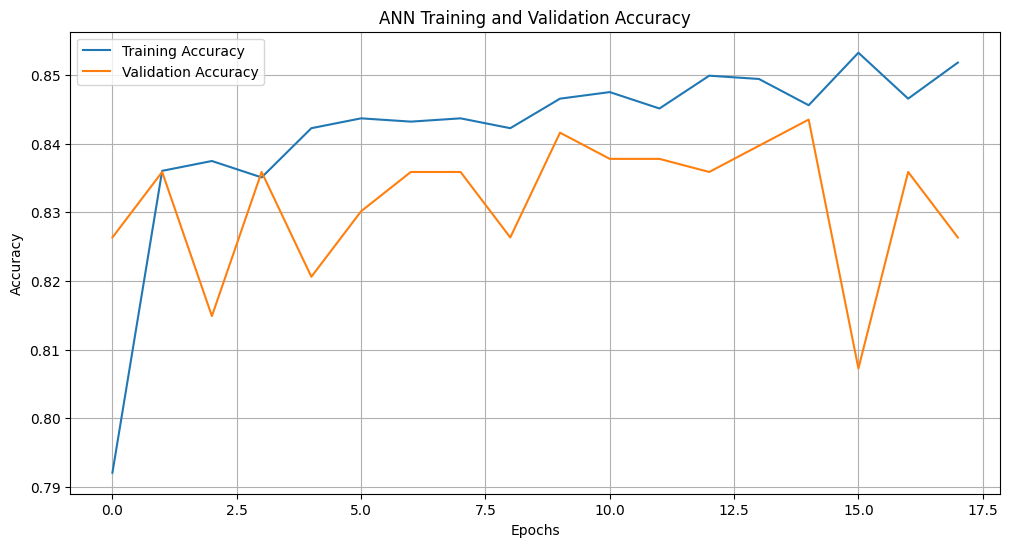

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

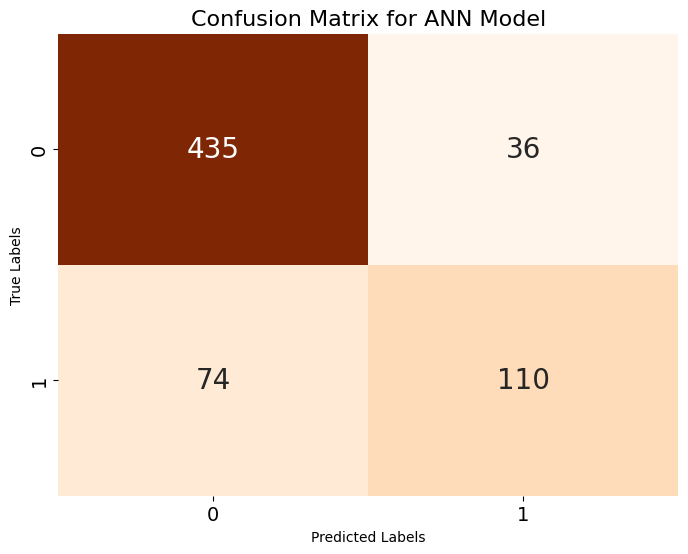

In [41]:
cm_ANN = confusion_matrix(y_test, ANN_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ANN, annot=True, annot_kws={"size": 20}, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix for ANN Model', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [42]:
joblib.dump(model,'ANN.job')

['ANN.job']

# **CNN**

In [43]:
x_train_CNN = np.expand_dims(x_train_scaled, axis=2)
x_test_CNN = np.expand_dims(x_test_scaled, axis=2)

In [44]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_CNN.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [45]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
cv_scores = []

In [46]:
for train_index, val_index in kf.split(x_train_CNN):
    x_fold_train, x_fold_val = x_train_CNN[train_index], x_train_CNN[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = create_cnn_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(x_fold_train, y_fold_train, epochs=50, batch_size=10, validation_data=(x_fold_val, y_fold_val), callbacks=[early_stopping], verbose=1)

    scores = model.evaluate(x_fold_val, y_fold_val, verbose=0)
    cv_scores.append(scores[1])
    print(f'Fold Score: {scores[1]}')

mean_cv_score = np.mean(cv_scores)
print(f'Mean CV Score: {mean_cv_score}')

Epoch 1/50
210/210 [==============================] - 2s 5ms/step - loss: 0.4861 - accuracy: 0.7887 - val_loss: 0.3878 - val_accuracy: 0.8435
Epoch 2/50
210/210 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 0.8298 - val_loss: 0.3803 - val_accuracy: 0.8321
Epoch 3/50
210/210 [==============================] - 1s 3ms/step - loss: 0.3915 - accuracy: 0.8337 - val_loss: 0.3804 - val_accuracy: 0.8397
Epoch 4/50
210/210 [==============================] - 1s 4ms/step - loss: 0.3889 - accuracy: 0.8375 - val_loss: 0.3833 - val_accuracy: 0.8282
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3851 - accuracy: 0.8360 - val_loss: 0.3768 - val_accuracy: 0.8416
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.8394 - val_loss: 0.3732 - val_accuracy: 0.8435
Epoch 7/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3804 - accuracy: 0.8360 - val_loss: 0.3758 - val_accuracy: 0.8435
Epoch 

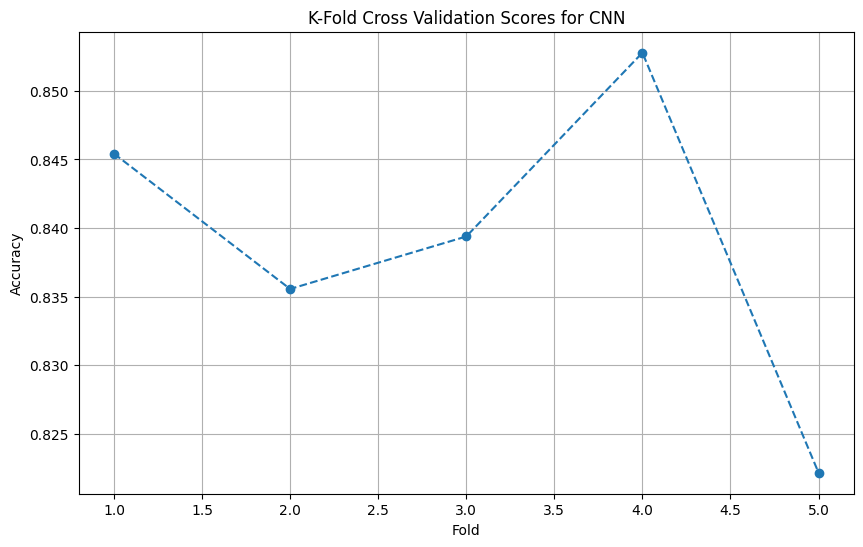

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, kf.get_n_splits() + 1), cv_scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Scores for CNN')
plt.grid(True)
plt.show()

In [48]:
model = create_cnn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_CNN, y_train, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
210/210 [==============================] - 2s 7ms/step - loss: 0.4558 - accuracy: 0.7968 - val_loss: 0.4288 - val_accuracy: 0.8130
Epoch 2/50
210/210 [==============================] - 1s 6ms/step - loss: 0.3947 - accuracy: 0.8308 - val_loss: 0.4164 - val_accuracy: 0.8263
Epoch 3/50
210/210 [==============================] - 1s 6ms/step - loss: 0.3888 - accuracy: 0.8337 - val_loss: 0.4102 - val_accuracy: 0.8378
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.3850 - accuracy: 0.8332 - val_loss: 0.4056 - val_accuracy: 0.8282
Epoch 5/50
210/210 [==============================] - 1s 6ms/step - loss: 0.3806 - accuracy: 0.8370 - val_loss: 0.4023 - val_accuracy: 0.8397
Epoch 6/50
210/210 [==============================] - 1s 4ms/step - loss: 0.3813 - accuracy: 0.8389 - val_loss: 0.4032 - val_accuracy: 0.8359
Epoch 7/50
210/210 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8413 - val_loss: 0.4080 - val_accuracy: 0.8397
Epoch 

In [49]:
CNN_accuracy = model.evaluate(x_test_CNN, y_test, verbose=0)[1]
CNN_predictions = (model.predict(x_test_CNN) > 0.5).astype("int32")
CNN_probabilities = model.predict(x_test_CNN)
CNN_JaccardIndex = jaccard_score(y_test, CNN_predictions, average='binary')
CNN_F1_Score = f1_score(y_test, CNN_predictions, average='binary')
CNN_Log_Loss = log_loss(y_test, CNN_probabilities)

print(f"Accuracy Score: {CNN_accuracy}")
print(f"Jaccard Index: {CNN_JaccardIndex}")
print(f"F1 Score: {CNN_F1_Score}")
print(f"Log Loss: {CNN_Log_Loss}")

21/21 [==============================] - 0s 4ms/step
Accuracy Score: 0.8320610523223877
Jaccard Index: 0.4977168949771689
F1 Score: 0.6646341463414634
Log Loss: 0.3824855133171499


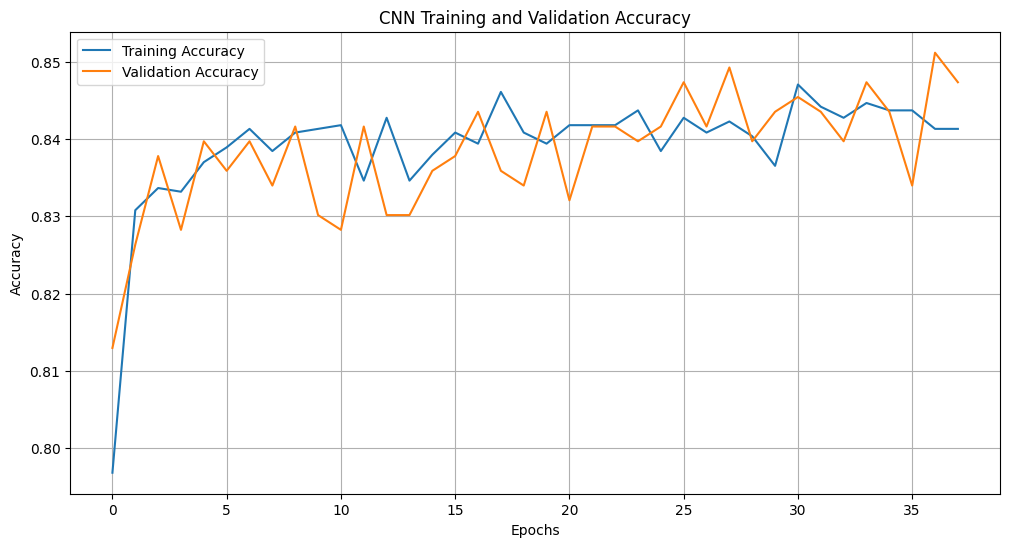

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

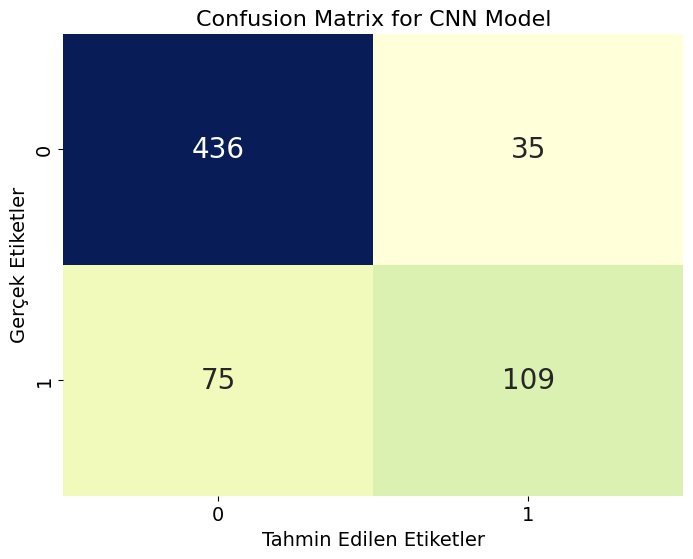

In [51]:
cm_CNN = confusion_matrix(y_test, CNN_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_CNN, annot=True, annot_kws={"size": 20}, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix for CNN Model', fontsize=16)
plt.xlabel('Tahmin Edilen Etiketler', fontsize=14)
plt.ylabel('Gerçek Etiketler', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [52]:
joblib.dump(model, 'CNN.job')

['CNN.job']

# **Sonuçlar**

In [53]:
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Logistic Regression', 'SVC', 'ANN', 'CNN'],
    'Accuracy': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVC_Accuracy_Score, ANN_accuracy, CNN_accuracy],
    'Jaccard Index': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVC_JaccardIndex, ANN_JaccardIndex, CNN_JaccardIndex],
    'F1 Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVC_F1_Score, ANN_F1_Score, CNN_F1_Score],
    'Log Loss': [KNN_Log_Loss, Tree_Log_Loss, LR_Log_Loss, SVC_Log_Loss, ANN_Log_Loss, CNN_Log_Loss]
})

results

,Model,Accuracy,Jaccard Index,F1 Score,Log Loss
0,KNN,0.833588,0.480952,0.649518,0.546094
1,Decision Tree,0.824427,0.472477,0.641745,0.507958
2,Logistic Regression,0.830534,0.490826,0.658462,0.375161
3,SVC,0.832061,0.468599,0.638158,0.414528
4,ANN,0.832061,0.500000,0.666667,0.377513
5,CNN,0.832061,0.497717,0.664634,0.382486


# **Grafikler**

In [54]:
models = ['LR', 'KNN', 'Tree', 'SVC','ANN','CNN']

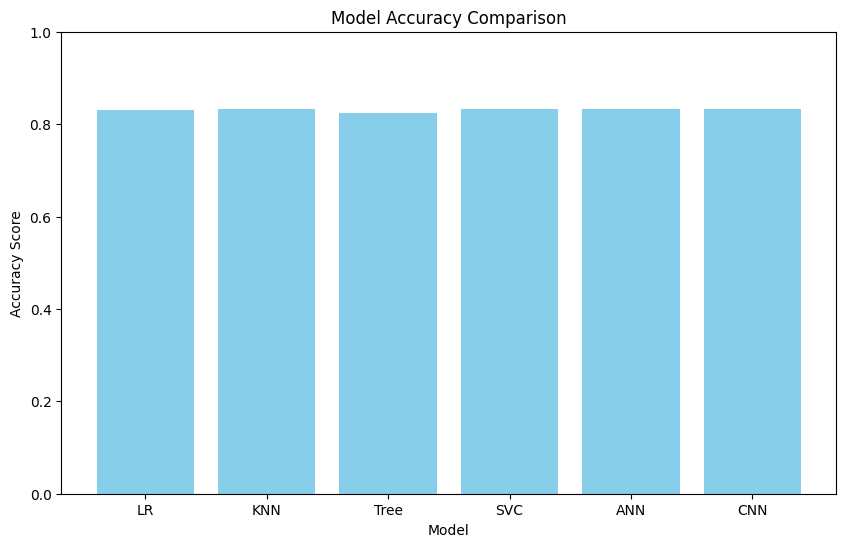

In [55]:
accuracy_scores = [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVC_Accuracy_Score, ANN_accuracy, CNN_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

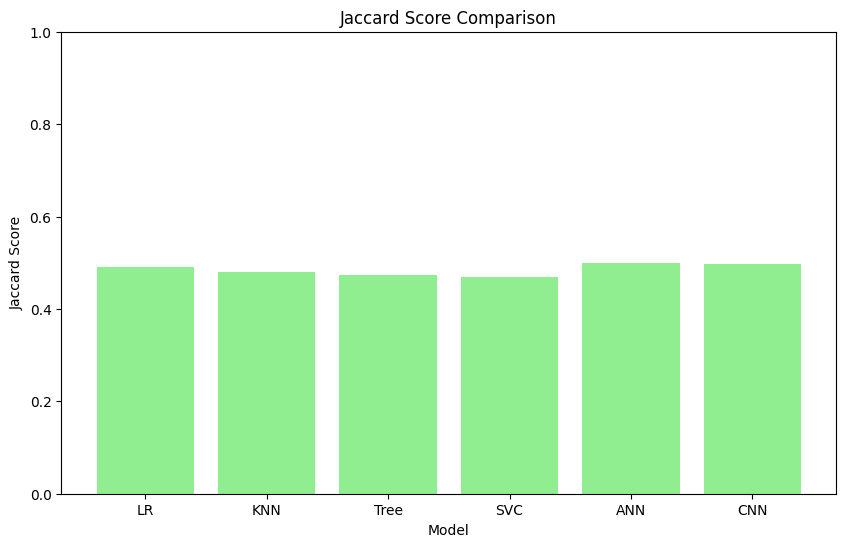

In [56]:
jaccard_scores = [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVC_JaccardIndex,ANN_JaccardIndex, CNN_JaccardIndex]

plt.figure(figsize=(10, 6))
plt.bar(models, jaccard_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Jaccard Score')
plt.title('Jaccard Score Comparison')
plt.ylim(0, 1)
plt.show()

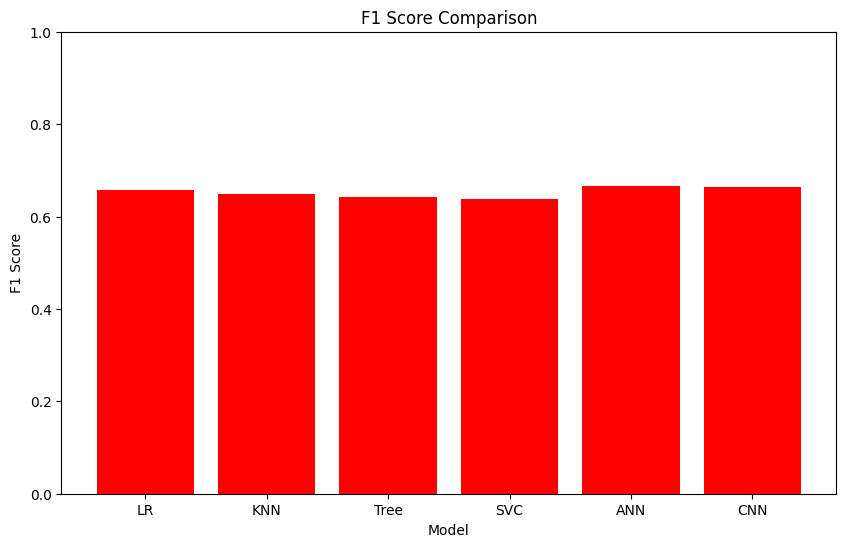

In [57]:
f1_scores = [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVC_F1_Score, ANN_F1_Score, CNN_F1_Score]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='red')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
plt.show()

Text(0.5, 1.0, 'Log Loss Comparison')

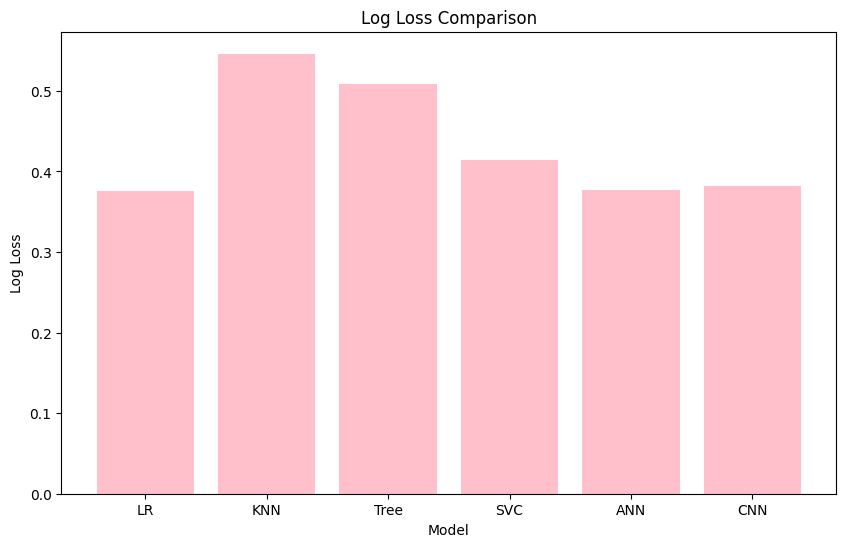

In [58]:
log_loss = [LR_Log_Loss, KNN_Log_Loss, Tree_Log_Loss, SVC_Log_Loss, ANN_Log_Loss, CNN_Log_Loss]

plt.figure(figsize=(10, 6))
plt.bar(models, log_loss, color='pink')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')

# **Gradio**

In [20]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.8 MB/s et

In [59]:
import gradio as gr

from google.colab import drive
drive.mount('/content/drive')

def make_prediction(Sunshine, Humidity3pm, Cloud3pm, RainToday, Cloud9am, Humidity9am, Rainfall, Temp3pm, MaxTemp, WindDir9am, model_input):
    with open(f"/content/drive/MyDrive/Yapay_Zeka_Proje/Models/{model_input}.job", "rb") as f:
        clf  = joblib.load(f)
        preds = clf.predict([[Sunshine, Humidity3pm, Cloud3pm, RainToday, Cloud9am, Humidity9am, Rainfall, Temp3pm, MaxTemp, WindDir9am]])
    if preds == 1:
            return f"{model_input}'a göre Yarın Yağar"
    return f"{model_input}'a göre Yarın Yağmaz"

Sunshine_input = gr.Number(label = "Güneşin olma oranı")
Humidity3pm_input = gr.Number(label = "saat 3'deki nem oranı")
Cloud3pm_input = gr.Number(label = "saat 3'deki bulut oranı")
RainToday_input = gr.Number(label = "Bugün yağışlı mı?")
Cloud9am_input = gr.Number(label = "saat 9'daki bulut oranı")
Humidity9am_input = gr.Number(label = "saat 9'daki nem oranı")
Rainfall_input = gr.Number(label = "yağış oranı")
Temp3pm_input = gr.Number(label = "saat 3'deki sıcaklık")
MaxTemp_input = gr.Number(label = "gün içindeki maksimum sıcaklık")
WindDir9am_input = gr.Number(label = "saat 9'daki yada")
model_input = gr.Radio(label = "Model", choices=["KNN","LR","SVC","Tree","ANN","CNN"], value="KNN")

output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[Sunshine_input, Humidity3pm_input, Cloud3pm_input, RainToday_input, Cloud9am_input, Humidity9am_input, Rainfall_input, Temp3pm_input, MaxTemp_input, WindDir9am_input, model_input], outputs=output)
app.launch()

#2.7 	73 	7 	7 	83 	6.0 	24.8 	25.6 	41
#0.0 	90 	8 	8 	83 	18.8 	20.9 	22.8 	41

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://29d8ce5970e4e6a734.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
